TIME: 250.0 sec
Final dt: 1.0 sec
PX (Normal Pressure): 3.2003 N
VX (Viscous/Tangential Shear): 28.94856 N
TX (Total = Pressure + Viscous): 32.14886 N


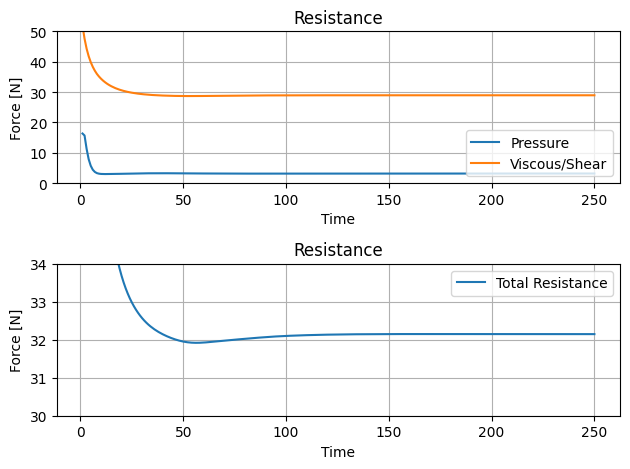

In [4]:
## For ESI Version of OpenFOAM
from fluidfoam.readpostpro import readforce
import matplotlib.pyplot as plt
from scipy import integrate

## Read Forces and Motions
sol = './'
force = readforce(sol, time_name = 'mergeTime', namepatch="forces", name="force")
# rbs = readforce(sol, time_name = 'mergeTime', namepatch="sixDoFRigidBodyState", name="sixDoFRigidBodyState")

## Plot the forces ##
time = force[:,0]
dt = time[1:-1] - time[0:-2]
px = -2*force[:,4]
vx = -2*force[:,7]
tx = -2*force[:,1]

fig, axs = plt.subplots(2, 1)
axs[0].plot(time, px, time, vx)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Force [N]')
axs[0].legend(['Pressure', 'Viscous/Shear'], loc='lower right')
axs[0].set_title('Resistance')
axs[0].set_ylim(0,50)
axs[0].grid()

axs[1].plot(time, tx)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Force [N]')
axs[1].legend(['Total Resistance'])
axs[1].set_title('Resistance')
axs[1].set_ylim(30,34)
axs[1].grid()

fig.tight_layout()

# ## Plot the rigid body state ##
# time  = rbs[:,0]
# trim  = rbs[:,8]
# q     = rbs[:,14] # pitch velocity
# w     = rbs[:,12] # heave velocity
# heave = integrate.cumtrapz(w, time, initial=0)*1000


# fig, axs = plt.subplots(2, 1)

# axs[0].plot(time, w)
# axs[0].set_xlabel('Time')
# axs[0].set_ylabel('Velocity [m/s]')
# axs[0].set_title('Heave Velocity')
# # axs[0].set_ylim(-0.005,0.005)
# axs[0].grid()

# axs[1].plot(time, heave)
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Heave [mm]')
# axs[1].set_title('Heave Full Scale')
# axs[1].grid()

# fig.tight_layout()

# fig, axs = plt.subplots(2, 1)

# axs[0].plot(time, q)
# axs[0].set_xlabel('Time')
# axs[0].set_ylabel('Angular Velocity [deg/s]')
# axs[0].set_title('Pitch Rate')
# # axs[0].set_ylim(-0.15,0.15)
# axs[0].grid()

# axs[1].plot(time, trim)
# axs[1].set_xlabel('Time')
# axs[1].set_ylabel('Angle [deg]')
# axs[1].set_title('Trim')
# axs[1].grid()

# fig.tight_layout()

# fig, axs = plt.subplots(1, 1)

# axs.plot(time[0:-2], dt)
# axs.set_xlabel('Time')
# axs.set_ylabel('delta T [sec]')
# axs.set_title('Time Step')
# # axs.set_ylim(-0.25,0.75)
# axs.grid()

# fig.tight_layout()
# plt.show()

print('TIME:', time[-1], 'sec')
print('Final dt:' , time[-1]-time[-2], 'sec')
print('PX (Normal Pressure):', px[-1], 'N')
print('VX (Viscous/Tangential Shear):', vx[-1], 'N')
print('TX (Total = Pressure + Viscous):', tx[-1], 'N')
# print('Trim:', trim[-1], 'deg')
# print('Sinkage or Heave Integral:', heave[-1], 'mm (Model Scale)')